Initial experiments with creating RGBA image by adding A channel based on depth. Then writing RGBA to RGB to use in detection. Basically some high depth values are getting "whitish" color

In [1]:
import sys

sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')

In [2]:
from oyla.mvc.utils import rgb_depth_view_matching

In [3]:
import numpy as np
import scipy.io
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
dir_path='/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/Oct 16 - RG visit Set 3/27_SpotB_data_October_16_20_37_05//'

In [5]:
index = 300

In [6]:
rgb = scipy.io.loadmat(dir_path+'/data_c_'+str(index)+'.mat')

rgb = rgb['data'][0][4]

rgb = rgb_depth_view_matching(rgb)
#rgb = np.fliplr(np.flipud(rgb))

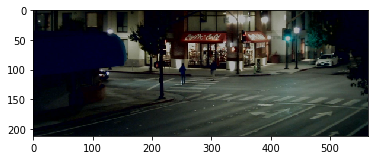

In [7]:
plt.imshow(rgb)

In [8]:
dist = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'.bin',np.uint16())
ampl = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'_ampl.bin',np.uint16())

dist = dist.reshape(120,320)
ampl = ampl.reshape(120,320)

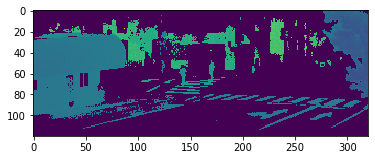

In [9]:
plt.imshow(dist)

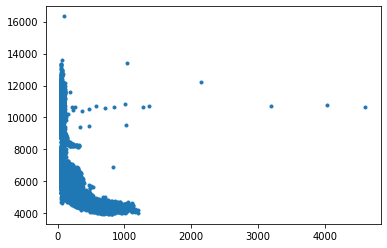

In [10]:
plt.plot(ampl[ampl<65000],dist[ampl<65000],'.')

In [11]:
print(np.count_nonzero(ampl==65300))
print(np.count_nonzero(ampl>65300))
print(np.count_nonzero(ampl<65300))

26022
10
12368


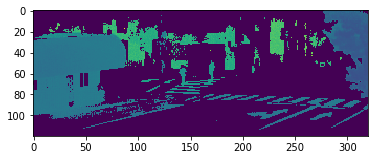

In [12]:
D = dist.copy()
D[ampl>1600] = 0
plt.imshow(D)

b = dist[dist>100]
a = np.exp(-1*dist[dist>100]/18000)

a.max()

plt.plot(b,a,'.')

In [13]:
alpha = dist/dist.max()

In [14]:
np.nonzero(alpha==0)[0].shape
120*320

38400

In [15]:
im = np.zeros((120,320,4))

In [16]:
rgb.shape

(212, 565, 3)

In [17]:
dist.shape

(120, 320)

In [18]:
import cv2

In [19]:
_rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)

In [20]:
_rgb.shape

(120, 320, 3)

In [21]:
im[:,:,:3]=_rgb/255.0

In [22]:
im[:,:,3] = 1-alpha

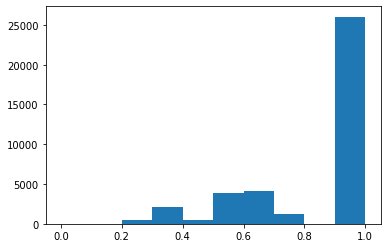

In [23]:
_=plt.hist(im[:,:,3].reshape(-1))

In [24]:
dist[ampl>1500]=0
dist[dist>15000] = 0
alpha = dist/np.max(dist)

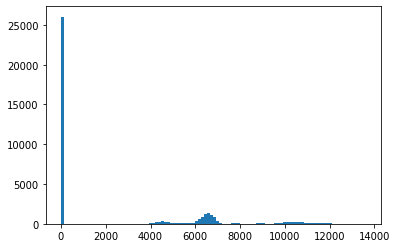

In [25]:
_ = plt.hist(dist.reshape(-1),100)

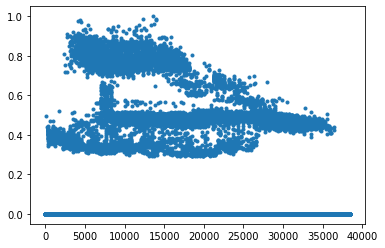

In [26]:
plt.plot(alpha.reshape(-1),'.')

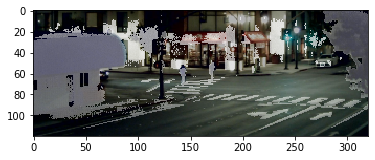

In [27]:
plt.imshow(im)

In [28]:
_im = cv2.cvtColor(im.astype('float32'),cv2.COLOR_RGBA2RGB)

In [29]:
np.mean(np.abs(im[:,:,:3]-_im))

4.667206158765176e-09

In [30]:
def rgba2rgb(source):
    target = np.zeros((source.shape[0],source.shape[1],3))
    bg =[0.5,0.5,0.5]*2
    for i in range(3):
         target[:,:,i] = ((1 - source[:,:,3]) * bg[i]) + (source[:,:,3] * source[:,:,i])
    return target
#Target.G = ((1 - Source.A) * BGColor.G) + (Source.A * Source.G)
#Target.B = ((1 - Source.A) * BGColor.B) + (Source.A * Source.B)

In [31]:
_im = rgba2rgb(im)

In [32]:
np.mean(np.abs(_im-im[:,:,:3]))

0.052465381413869666

In [33]:
np.where(im[:,:,3]>0.5)[0].shape

(35328,)

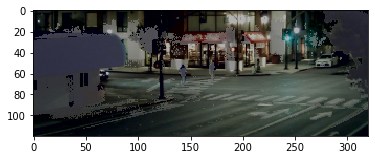

In [34]:
plt.imshow(_im)

In [35]:
__im = np.rint(_im*255).astype('uint8')

In [36]:
a = np.exp(-1*dist/dist.max())
a.max()

1.0

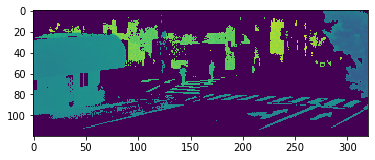

In [37]:
plt.imshow(dist)

In [38]:
hsv  = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)

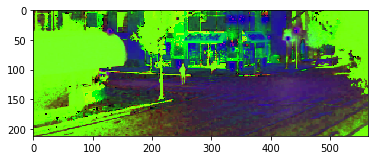

In [39]:
plt.imshow(hsv,cmap='hsv')

In [42]:
plt.imsave('/Users/rsingh/Downloads/test.png',rgb)

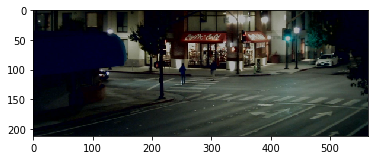

In [40]:
plt.imshow(rgb)